In [ ]:
# TOFABIEN: great work with pandas. Functions might be recoded. 

In [1]:
#!pip install nltk

In [2]:
import nltk
import matplotlib.pyplot as plt
import pandas as pd
from ast import literal_eval
get_tokens_list = lambda x: literal_eval(x) if type(x) == str else []
to_list = lambda string: string.split(", ") if type(string) == str else []

# TOFABIEN: here there are a couple of function here, later on in another box, there is another one. Are you following some sort of method?

ModuleNotFoundError: No module named 'nltk'

In [ ]:
nltk.download('popular')
# Compare to tokens with no cleaning
# df_tokens = pd.DataFrame.from_dict(nltk.FreqDist(tokens), orient='index')
# df_tokens.columns = ['Frequency']
# df_tokens.index.name = 'Term'

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /Users/fabien/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /Users/fabien/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /Users/fabien/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /Users/fabien/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /Users/fabien/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /Users/fabien/nltk_data...
[nltk_data]    |   Package movie_reviews is already

True

# Init exploration about reviews table and normalize rate on 100

In [ ]:
link = "./rotten_tomatoes_critic_reviews_tokens.csv"
link2 ='./rotten_tomatoes_movies.csv'
# method to convert format rate 3/5 to float
# TOFABIEN: why not eval?

def get_score(rate):
    if type(rate) == str:
        r = rate.split("/")[0]
        if len(r) > 0:
            return float(r)

critic_reviews = pd.read_csv(link, converters={'review_date': pd.to_datetime})
movies = pd.read_csv(link2, converters={'original_release_date': pd.to_datetime, 'streaming_release_date': pd.to_datetime})

In [ ]:
critic_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1130017 entries, 0 to 1130016
Data columns (total 11 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   Unnamed: 0            1130017 non-null  int64         
 1   rotten_tomatoes_link  1130017 non-null  object        
 2   critic_name           1111488 non-null  object        
 3   top_critic            1130017 non-null  bool          
 4   publisher_name        1130017 non-null  object        
 5   review_type           1130017 non-null  object        
 6   review_score          824081 non-null   object        
 7   review_date           1130017 non-null  datetime64[ns]
 8   review_content        1064211 non-null  object        
 9   review_score_float    777569 non-null   float64       
 10  tokens                1064211 non-null  object        
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 87.3+ MB


In [ ]:
critic_reviews.head()

Unnamed: 0 rotten_tomatoes_link      critic_name  top_critic  \
0           0            m/0814255  Andrew L. Urban       False   
1           1            m/0814255    Louise Keller       False   
2           2            m/0814255              NaN       False   
3           3            m/0814255     Ben McEachen       False   
4           4            m/0814255      Ethan Alter        True   

            publisher_name review_type review_score review_date  \
0           Urban Cinefile       Fresh          NaN  2010-02-06   
1           Urban Cinefile       Fresh          NaN  2010-02-06   
2      FILMINK (Australia)       Fresh          NaN  2010-02-09   
3  Sunday Mail (Australia)       Fresh        3.5/5  2010-02-09   
4       Hollywood Reporter      Rotten          NaN  2010-02-10   

                                      review_content  review_score_float  \
0  A fantasy adventure that fuses Greek mythology...                 NaN   
1  Uma Thurman as Medusa, the gorgon with a coiff...                 NaN   
2  With a top-notch cast and dazzling special eff...                 NaN   
3  Whether audiences will get behind The Lightnin...                70.0   
4  What's really lacking in The Lightning Thief i...                 NaN   

                                              tokens  
0  ['a', 'fantasy', 'adventure', 'that', 'fuses',...  
1  ['uma', 'thurman', 'as', 'medusa', ',', 'the',...  
2  ['with', 'a', 'top-notch', 'cast', 'and', 'daz...  
3  ['whether', 'audiences', 'will', 'get', 'behin...  
4  ['what', "'s", 'really', 'lacking', 'in', 'the...

In [ ]:
def get_score(x):
    x = x.replace(" ", "")
    letters = {"A":14, "B":11, "C":8,"D":5,"E":2, "F":0}
    # TOFABIEN: another option is to change the letters in fractions that are already in the dataset and 
    #           then change everything at once (with eval or something)
        #convert string "3.4/5" or "67/100" to rate on 100
    if (type(x)==str) and ('/' in x) and (float(x.split("/")[1]) > float(x.split("/")[0])):
        return 100*(float(x.split("/")[0]) / float(x.split("/")[1]))
    elif x[0] in letters.keys():
        # TO FABIEN: is there an else somewhere? Otherwise this one is the else (another option is to check whether first char is numeric)
        #convert letters rate to rate on 100
        return 100*((letters[x[0]] + 44 - ord(x[1]) if len(x)>1 and x[1] in "-+" else letters[x[0]])/15)

critic_reviews["review_score_float"] = critic_reviews[critic_reviews["review_score"].isna()==False]["review_score"].apply(get_score)
critic_reviews[critic_reviews["review_score_float"].isna()==False]["review_score_float"]

3          70.000000
6          25.000000
7          70.000000
8          73.333333
9          60.000000
             ...    
1130012    40.000000
1130013    70.000000
1130014    80.000000
1130015    70.000000
1130016    53.333333
Name: review_score_float, Length: 777569, dtype: float64

In [ ]:
critic_reviews[(critic_reviews["review_score"].isna() != True) | (critic_reviews["review_score_float"].isna() != True)][["review_score", "review_score_float"]]

review_score  review_score_float
3              3.5/5           70.000000
6                1/4           25.000000
7              3.5/5           70.000000
8                  B           73.333333
9                3/5           60.000000
...              ...                 ...
1130012          2/5           40.000000
1130013        3.5/5           70.000000
1130014           B+           80.000000
1130015        3.5/5           70.000000
1130016            C           53.333333

[824081 rows x 2 columns]

In [ ]:
critic_reviews.describe()

Unnamed: 0  review_score_float
count  1.130017e+06       777569.000000
mean   5.650080e+05           61.542096
std    3.262080e+05           19.459735
min    0.000000e+00            0.000000
25%    2.825040e+05           50.000000
50%    5.650080e+05           62.500000
75%    8.475120e+05           80.000000
max    1.130016e+06           99.900000

In [ ]:
# Check why value max is 900
critic_reviews[critic_reviews["review_score_float"] > 100]

Empty DataFrame
Columns: [Unnamed: 0, rotten_tomatoes_link, critic_name, top_critic, publisher_name, review_type, review_score, review_date, review_content, review_score_float, tokens]
Index: []

# Analyse movie table and compare rate from audience and tomatoemeter

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17712 entries, 0 to 17711
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   rotten_tomatoes_link              17712 non-null  object        
 1   movie_title                       17712 non-null  object        
 2   movie_info                        17391 non-null  object        
 3   critics_consensus                 9134 non-null   object        
 4   content_rating                    17712 non-null  object        
 5   genres                            17693 non-null  object        
 6   directors                         17518 non-null  object        
 7   authors                           16170 non-null  object        
 8   actors                            17360 non-null  object        
 9   original_release_date             16546 non-null  datetime64[ns]
 10  streaming_release_date            17328 non-nu

In [ ]:
movies.describe()

runtime  tomatometer_rating  tomatometer_count  audience_rating  \
count  17398.000000        17668.000000       17668.000000     17416.000000   
mean     102.214048           60.884763          57.139801        60.554260   
std       18.702511           28.443348          68.370047        20.543369   
min        5.000000            0.000000           5.000000         0.000000   
25%       90.000000           38.000000          12.000000        45.000000   
50%       99.000000           67.000000          28.000000        63.000000   
75%      111.000000           86.000000          75.000000        78.000000   
max      266.000000          100.000000         574.000000       100.000000   

       audience_count  tomatometer_top_critics_count  \
count    1.741500e+04                   17712.000000   
mean     1.439401e+05                      14.586326   
std      1.763577e+06                      15.146349   
min      5.000000e+00                       0.000000   
25%      7.075000e+02                       3.000000   
50%      4.277000e+03                       8.000000   
75%      2.498800e+04                      23.000000   
max      3.579764e+07                      69.000000   

       tomatometer_fresh_critics_count  tomatometer_rotten_critics_count  
count                     17712.000000                      17712.000000  
mean                         36.374831                         20.703139  
std                          52.601038                         30.248435  
min                           0.000000                          0.000000  
25%                           6.000000                          3.000000  
50%                          16.000000                          8.000000  
75%                          44.000000                         24.000000  
max                         497.000000                        303.000000

In [ ]:
movies.head(3)

rotten_tomatoes_link                                        movie_title  \
0            m/0814255  Percy Jackson & the Olympians: The Lightning T...   
1            m/0878835                                        Please Give   
2                 m/10                                                 10   

                                          movie_info  \
0  Always trouble-prone, the life of teenager Per...   
1  Kate (Catherine Keener) and her husband Alex (...   
2  A successful, middle-aged Hollywood songwriter...   

                                   critics_consensus content_rating  \
0  Though it may seem like just another Harry Pot...             PG   
1  Nicole Holofcener's newest might seem slight i...              R   
2  Blake Edwards' bawdy comedy may not score a pe...              R   

                                              genres          directors  \
0  Action & Adventure, Comedy, Drama, Science Fic...     Chris Columbus   
1                                             Comedy  Nicole Holofcener   
2                                    Comedy, Romance      Blake Edwards   

                                      authors  \
0  Craig Titley, Chris Columbus, Rick Riordan   
1                           Nicole Holofcener   
2                               Blake Edwards   

                                              actors original_release_date  \
0  Logan Lerman, Brandon T. Jackson, Alexandra Da...            2010-02-12   
1  Catherine Keener, Amanda Peet, Oliver Platt, R...            2010-04-30   
2  Dudley Moore, Bo Derek, Julie Andrews, Robert ...            1979-10-05   

   ...      production_company  tomatometer_status tomatometer_rating  \
0  ...        20th Century Fox              Rotten               49.0   
1  ...  Sony Pictures Classics     Certified-Fresh               87.0   
2  ...             Waner Bros.               Fresh               67.0   

  tomatometer_count  audience_status  audience_rating audience_count  \
0             149.0          Spilled             53.0       254421.0   
1             142.0          Upright             64.0        11574.0   
2              24.0          Spilled             53.0        14684.0   

   tomatometer_top_critics_count  tomatometer_fresh_critics_count  \
0                             43                               73   
1                             44                              123   
2                              2                               16   

   tomatometer_rotten_critics_count  
0                                76  
1                                19  
2                                 8  

[3 rows x 22 columns]

In [ ]:
#movies.drop("diff_rate_audience_tomatometter", axis=1, inplace=True)
movies["diff_rate_audience_tomatometter"] = movies[movies['critics_consensus'].isna() != True]["audience_rating"] - movies[movies['critics_consensus'].isna() != True]["tomatometer_rating"]
movies[movies['diff_rate_audience_tomatometter'].isna() != True].sort_values(by=['diff_rate_audience_tomatometter'], ascending=False)[["movie_info","critics_consensus", "audience_rating","tomatometer_rating", "diff_rate_audience_tomatometter"]]
#movies.info()

movie_info  \
7760   Filmmaker Dinesh D'Souza examines presidential...   
11487  Combining outrageous, sexy comedy with the hot...   
13916  Kicked out by his parents, a gay teenager (Jer...   
2619   Political commentator, author and filmmaker Di...   
10504  In early 20th-century Paris, Pablo Picasso (Om...   
...                                                  ...   
2330   Awkward teen Adam spends his last high school ...   
2710   Amy Schumer gives a refreshingly honest and hi...   
7452                                                 NaN   
9079   A young bartender in the Bronx, a coal miner's...   
10984  Faced with an unintended pregnancy and a lack ...   

                                       critics_consensus  audience_rating  \
7760   Hillary's America: The Secret History of the D...             80.0   
11487  A party movie that substitutes surfs for snow,...             84.0   
13916  As an ordinary coming-of-age drama, Stonewall ...             85.0   
2619   Passionate but poorly constructed, America pre...             84.0   
10504  Nearly everyone is miscast in this disjointed ...             78.0   
...                                                  ...              ...   
2330   Much like its well-meaning but clueless protag...              8.0   
2710   Amy Schumer's standup matures in an hour fille...              9.0   
7452   Hannah Gadsby: Nanette brilliantly moves moder...             25.0   
9079   A galvanizing glimpse behind the scenes of a p...             20.0   
10984  Powerfully acted and directed, Never Rarely So...             20.0   

       tomatometer_rating  diff_rate_audience_tomatometter  
7760                  4.0                             76.0  
11487                 8.0                             76.0  
13916                 9.0                             76.0  
2619                  8.0                             76.0  
10504                 4.0                             74.0  
...                   ...                              ...  
2330                 74.0                            -66.0  
2710                 79.0                            -70.0  
7452                100.0                            -75.0  
9079                 99.0                            -79.0  
10984                99.0                            -79.0  

[9114 rows x 5 columns]

In [ ]:
gp_reviews_critic_mean = critic_reviews.groupby(["rotten_tomatoes_link"])["review_score_float"].mean().reset_index()
gp_reviews_critic_mean.columns = ['rotten_tomatoes_link', 'critic_table_score_float']
gp_reviews_critic_mean

rotten_tomatoes_link  critic_table_score_float
0                         m/+_one_2019                 72.310606
1                                 m/+h                 43.888889
2                              m/-_man                 58.750000
3      m/-cule_valley_of_the_lost_ants                 67.142857
4                            m/0814255                 55.095628
...                                ...                       ...
17707                      m/zoot_suit                 49.333333
17708                       m/zootopia                 78.362756
17709                m/zorba_the_greek                 75.333333
17710                           m/zulu                 74.679487
17711                      m/zulu_dawn                 61.666667

[17712 rows x 2 columns]

In [ ]:
movies.columns

Index(['rotten_tomatoes_link', 'movie_title', 'movie_info',
       'critics_consensus', 'content_rating', 'genres', 'directors', 'authors',
       'actors', 'original_release_date', 'streaming_release_date', 'runtime',
       'production_company', 'tomatometer_status', 'tomatometer_rating',
       'tomatometer_count', 'audience_status', 'audience_rating',
       'audience_count', 'tomatometer_top_critics_count',
       'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count',
       'diff_rate_audience_tomatometter', 'X', 'X_clean', 'X_stem', 'X_lem'],
      dtype='object')

In [ ]:
movies = movies.merge(gp_reviews_critic_mean, on="rotten_tomatoes_link", how="left")

In [ ]:
movies.columns

Index(['rotten_tomatoes_link', 'movie_title', 'movie_info',
       'critics_consensus', 'content_rating', 'genres', 'directors', 'authors',
       'actors', 'original_release_date', 'streaming_release_date', 'runtime',
       'production_company', 'tomatometer_status', 'tomatometer_rating',
       'tomatometer_count', 'audience_status', 'audience_rating',
       'audience_count', 'tomatometer_top_critics_count',
       'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count',
       'diff_rate_audience_tomatometter', 'X', 'X_clean', 'X_stem', 'X_lem',
       'critic_table_score_float'],
      dtype='object')

In [ ]:
columns = ["critic_table_score_float", "audience_rating", "audience_status", "tomatometer_rating","tomatometer_status"]
for col in columns:
    print(col,":",movies[col].isna().sum()/movies.shape[0])

critic_table_score_float : 0.002540650406504065
audience_rating : 0.016711833785004515
audience_status : 0.025293586269196026
tomatometer_rating : 0.0024841915085817524
tomatometer_status : 0.0024841915085817524


In [ ]:
pd.pivot_table(movies, index = ["audience_status", 'tomatometer_status'], values=["critic_table_score_float", "tomatometer_rating","tomatometer_count","audience_rating","audience_count","diff_rate_audience_tomatometter"])
#pd.pivot_table(movies, index = ["audience_status", 'tomatometer_status'], values=["critic_table_score_float", "tomatometer_rating","audience_rating"])

audience_count  audience_rating  \
audience_status tomatometer_status                                    
Spilled         Certified-Fresh      497924.536023        50.435159   
                Fresh                 49059.782410        46.846975   
                Rotten               111214.941325        38.883369   
Upright         Certified-Fresh      371180.449051        79.886859   
                Fresh                 60322.781666        76.433233   
                Rotten               149396.394149        70.638490   

                                    critic_table_score_float  \
audience_status tomatometer_status                             
Spilled         Certified-Fresh                    68.825316   
                Fresh                              63.219543   
                Rotten                             46.145374   
Upright         Certified-Fresh                    73.753594   
                Fresh                              68.571970   
                Rotten                             51.976106   

                                    diff_rate_audience_tomatometter  \
audience_status tomatometer_status                                    
Spilled         Certified-Fresh                          -31.379412   
                Fresh                                    -21.308411   
                Rotten                                    10.081733   
Upright         Certified-Fresh                           -8.056252   
                Fresh                                     -2.283197   
                Rotten                                    29.671518   

                                    tomatometer_count  tomatometer_rating  
audience_status tomatometer_status                                         
Spilled         Certified-Fresh            112.000000           81.766571  
                Fresh                       34.993391           73.514489  
                Rotten                      50.378870           30.025738  
Upright         Certified-Fresh            119.510190           87.966268  
                Fresh                       31.530056           82.334908  
                Rotten                      54.920787           39.137161

In [ ]:
#movies['genres'] = movies['genres'].apply(lambda x literal_eval)
movies['genres'] = movies['genres'].apply(to_list)
#movies['genres'].apply(lambda x: literal_eval(x))

In [ ]:
movies_rotten = movies[(movies["tomatometer_status"] == "Rotten") & (movies["audience_status"] == "Upright")]
pd.pivot_table(movies_rotten.explode("genres"), index = ['genres'], values=["critic_table_score_float", "tomatometer_rating","audience_rating", "diff_rate_audience_tomatometter"]).sort_values("diff_rate_audience_tomatometter", ascending=False).head(10)

audience_rating  critic_table_score_float  \
genres                                                            
Anime & Manga               76.000000                 57.939815   
Faith & Spirituality        76.619048                 53.245605   
Cult Movies                 69.000000                 49.456050   
Special Interest            73.416667                 54.190956   
Documentary                 73.408000                 53.742095   
Romance                     71.128676                 52.722761   
Drama                       71.123932                 52.784512   
Television                  68.000000                 52.080467   
Comedy                      69.892550                 51.084757   
Mystery & Suspense          69.232975                 51.116185   

                      diff_rate_audience_tomatometter  tomatometer_rating  
genres                                                                     
Anime & Manga                               49.000000           40.000000  
Faith & Spirituality                        44.400000           38.904762  
Cult Movies                                 32.000000           36.000000  
Special Interest                            31.571429           43.260417  
Documentary                                 30.772727           42.224000  
Romance                                     30.360248           39.669118  
Drama                                       30.095779           39.435897  
Television                                  30.000000           45.583333  
Comedy                                      29.752717           38.517192  
Mystery & Suspense                          29.666667           37.315412

# Analyse with NLKT the consens comment

In [ ]:
# TOFABIEN: movies[~movies['critics_consensus'].isna()] with tilde please :)
movies["X"] = movies[movies['critics_consensus'].isna() == False]['critics_consensus'].apply(lambda sentence: [w.lower() for w in nltk.word_tokenize(sentence)])
#X = movies[movies['critics_consensus'].isna() == False]['critics_consensus'].apply(lambda sentence: [w.lower() for w in nltk.word_tokenize(sentence)])
freq = nltk.FreqDist(movies[movies["X"].isna() == False]["X"].sum())
#movies.head(1)

In [ ]:
# TOFABIEN: advanced topic: now the processing is going to load the stopwords every cell, it would be speedier to load it once, 
#           outside the lambda save it in a variable. Then use the variable in the lambda function.
movies["X_clean"] = movies[movies["X"].isna() == False]["X"].apply(lambda tokens: \
                  [ w for w in tokens if w.lower() not in nltk.corpus.stopwords.words("english") ])
freq_clean = nltk.FreqDist(movies[movies["X"].isna() == False]["X_clean"].sum())

In [ ]:
# TOFABIEN: how about a function for the distfreq? :)

# Compare to tokens with no cleaning
df_tokens = pd.DataFrame.from_dict(freq, orient='index')
df_tokens.columns = ['Frequency']
df_tokens.index.name = 'Term'
# CHange the fred to DataFrame
df_words = pd.DataFrame.from_dict(freq_clean, orient='index')
df_words.columns = ['Frequency']
df_words.index.name = 'Term'

#fig = plt.subplots(figsize=(13,13))

#ax1 = plt.subplot(2,2,1)
#ax2 = plt.subplot(2,2,2)

#df_tokens.sort_values(['Frequency'], ascending=False).head(20).plot(kind="bar", ax = ax1)
#ax1.set(title="Tokens with stops words")
#df_words.sort_values(['Frequency'], ascending=False).head(20).plot(kind="bar", ax = ax2)
#ax2.set(title="Tokens cleaned")

In [ ]:
from nltk.stem import PorterStemmer

porter = PorterStemmer()
movies["X_stem"] = movies[movies["X_clean"].isna() == False]["X_clean"].apply(lambda words: [porter.stem(word.lower()) for word in words] )
# change to dataFrame to see better final results
df_stem = pd.DataFrame.from_dict(nltk.FreqDist(movies[movies["X_stem"].isna() == False]["X_stem"].sum()), orient='index')
df_stem.columns = ['Frequency']
df_stem.index.name = 'Term'
#df_stem.sort_values(['Frequency'], ascending=False).head(20).plot(kind="bar")

In [ ]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

movies["X_lem"] = movies[movies["X_clean"].isna() == False]["X_clean"].apply(lambda words: [wnl.lemmatize(word.lower()) for word in words] )
# change to dataFrame to see better final results

df_lem = pd.DataFrame.from_dict(nltk.FreqDist(movies[movies["X_lem"].isna() == False]["X_lem"].sum()), orient='index')
df_lem.columns = ['Frequency']
df_lem.index.name = 'Term'
#X_lem.sort_values(['Frequency'], ascending=False).head(20).plot(kind="bar")

[Text(0.5, 1.0, 'Lemmatized text')]

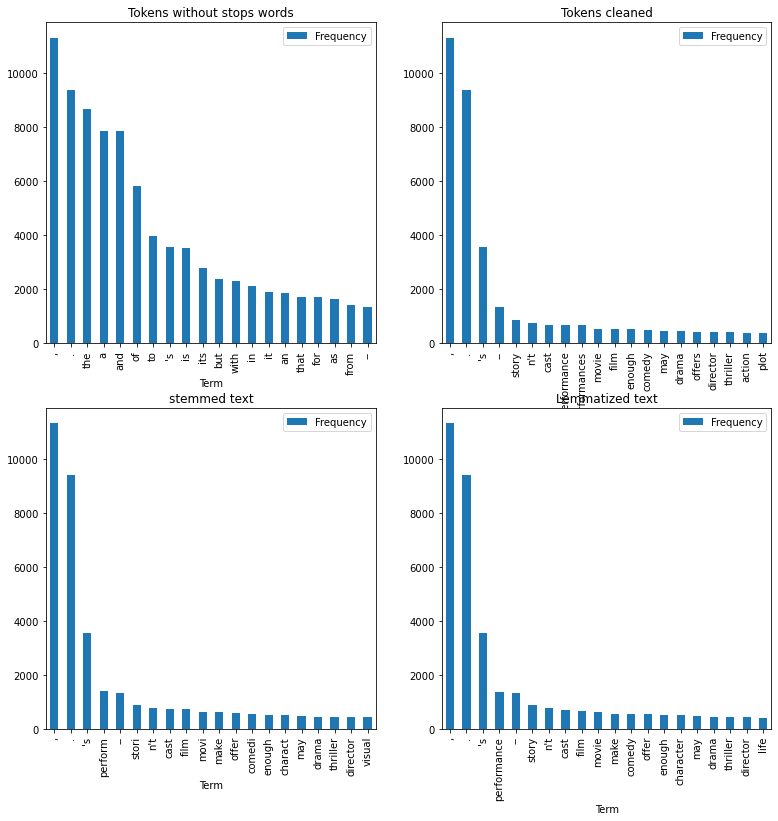

In [ ]:
fig = plt.subplots(figsize=(13,13))

ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,2,3)
ax4 = plt.subplot(2,2,4)

#initial text
df_tokens.sort_values(['Frequency'], ascending=False).head(20).plot(kind="bar", ax = ax1)
ax1.set(title="Tokens without stops words")

#after cleaning up stopwords and punctuation
df_words.sort_values(['Frequency'], ascending=False).head(20).plot(kind="bar", ax = ax2)
ax2.set(title="Tokens cleaned")

#cleaning up stopwords and punctuation + stemmer
df_stem.sort_values(['Frequency'], ascending=False).head(20).plot(kind="bar", ax= ax3)
ax3.set(title="stemmed text")

#after cleaning up stopwords and punctuation + lemmatizer.
df_lem.sort_values(['Frequency'], ascending=False).head(20).plot(kind="bar", ax= ax4)
ax4.set(title="Lemmatized text")


In [ ]:
#!conda install -c conda-forge gcc
#!conda install -c conda-forge wordcloud 
# or in command terminal
#import sys
#print(sys.executable)


[Text(0.5, 1.0, 'Lemmatized text')]

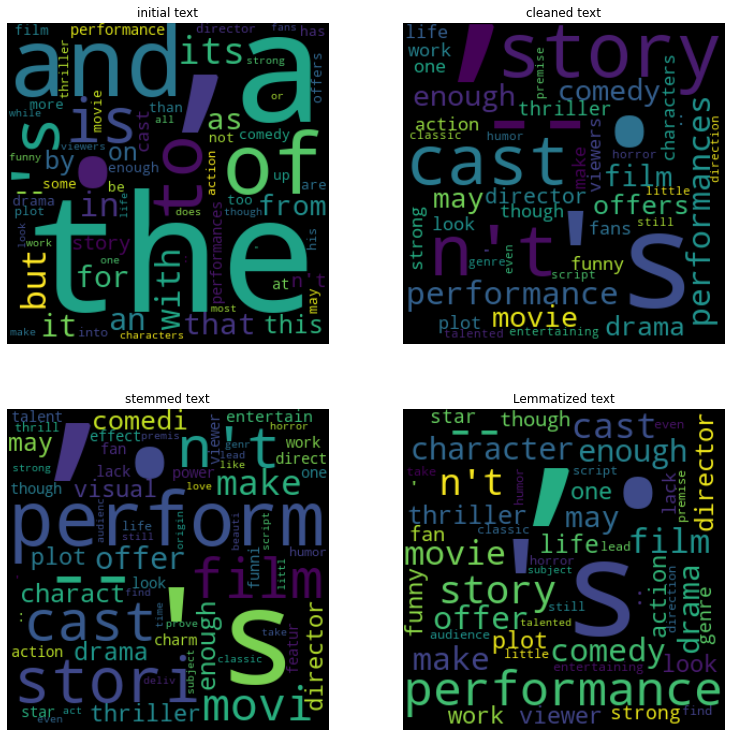

In [ ]:
from wordcloud import WordCloud
fig = plt.subplots(figsize=(13,13))

ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,2,3)
ax4 = plt.subplot(2,2,4)

#initial text
wordcloud1 = WordCloud(width=300, height=300, max_font_size=200, min_font_size=10)
wordcloud1.generate_from_frequencies(freq)

ax1.imshow(wordcloud1, interpolation="bilinear")
ax1.axis('off')
ax1.set(title="initial text")
plt.margins(x=0, y=0)

#after cleaning up stopwords and punctuation
wordcloud2 = WordCloud(width=300, height=300, max_font_size=200, min_font_size=10)
wordcloud2.generate_from_frequencies(freq_clean)

ax2.imshow(wordcloud2, interpolation="bilinear")
ax2.axis('off')
ax2.set(title="cleaned text")

#cleaning up stopwords and punctuation + stemmer
wordcloud3 = WordCloud(width=300, height=300, max_font_size=200, min_font_size=10)
wordcloud3.generate_from_frequencies(nltk.FreqDist(movies[movies["X_stem"].isna() == False]["X_stem"].sum()))

ax3.imshow(wordcloud3, interpolation="bilinear")
ax3.axis('off')
ax3.set(title="stemmed text")

#after cleaning up stopwords and punctuation + lemmatizer.
wordcloud4 = WordCloud(width=300, height=300, max_font_size=200, min_font_size=10)
wordcloud4.generate_from_frequencies(nltk.FreqDist(movies[movies["X_lem"].isna() == False]["X_lem"].sum()))

ax4.imshow(wordcloud4, interpolation="bilinear")
ax4.axis('off')
ax4.set(title="Lemmatized text")


In [ ]:
#!pip install sklearn

# Create a matrix with vectorise & TF - IDF of any alpha word longer than 2 caracters

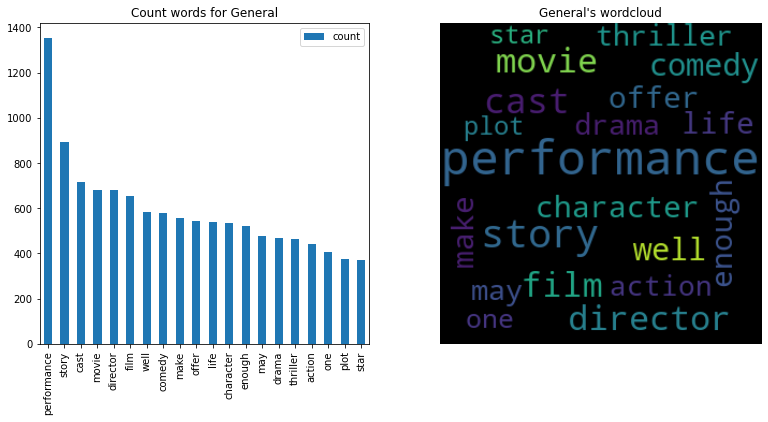

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
def get_count(X, name = "", max_features=20, regex_pattern = "([a-zA-Z]{2,})"):
    vectorizer = CountVectorizer(token_pattern=regex_pattern, max_features=max_features)
    #vectorizer = CountVectorizer()
    vectorizer.fit(X.values)
    text_matrix = vectorizer.fit_transform(X)

    df_matrix_neg = pd.DataFrame(text_matrix.toarray(), columns = vectorizer.get_feature_names_out())
    df_sum_matrix_neg = pd.DataFrame(df_matrix_neg.sum().sort_values(ascending=False), columns = ["count"])
    fig = plt.subplots(figsize=(13,13))

    ax1 = plt.subplot(2,2,1)
    ax2 = plt.subplot(2,2,2)

    ax1.set(title=f"Count words for {name}")
    df_sum_matrix_neg.plot(kind="bar", ax = ax1)

    #initial text
    wordcloud_neg = WordCloud(width=300, height=300, max_font_size=200, min_font_size=10)
    wordcloud_neg.generate_from_frequencies(df_matrix_neg.sum())

    ax2.imshow(wordcloud_neg, interpolation="bilinear")
    ax2.axis('off')
    ax2.set(title=f"{name}'s wordcloud")
    plt.margins(x=0, y=0)    

X = movies[movies["X_lem"].isna() == False]["X_lem"].apply(lambda wlist: " ".join(wlist))

get_count(X, name = "General")

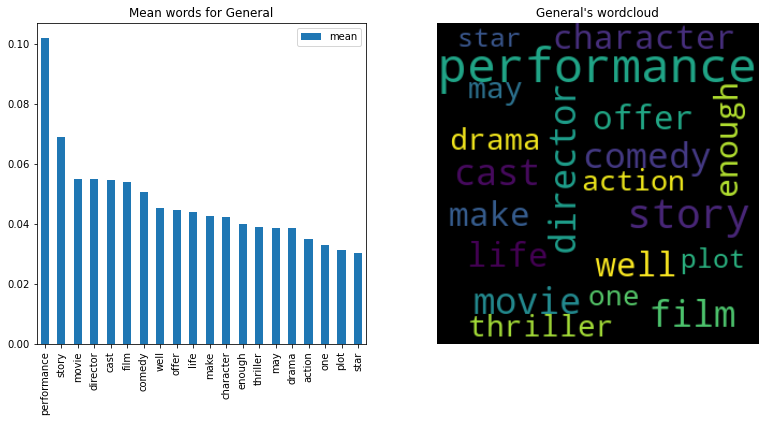

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

def get_tfidf(X, name = "", max_features=20, regex_pattern = "([a-zA-Z]{2,})"):
    tfidf = TfidfVectorizer(token_pattern=regex_pattern, max_features=max_features)

    tfidf.fit(X.values)
    text_matrix_tfidf = tfidf.fit_transform(X)

    df_matrix_tf_idf = pd.DataFrame(text_matrix_tfidf.toarray(), columns = tfidf.get_feature_names_out())
    #df_matrix_tf_idf.mean()
    df_mean_tf_idf = pd.DataFrame(df_matrix_tf_idf.mean(), columns = ["mean"])
    df_mean_tf_idf
    fig = plt.subplots(figsize=(13,13))

    ax1 = plt.subplot(2,2,1)
    ax2 = plt.subplot(2,2,2)

    wordcloud = WordCloud(width=300, height=300, max_font_size=50, min_font_size=10)
    wordcloud.generate_from_frequencies(df_matrix_tf_idf.mean().sort_values(ascending=False).head(40))

    ax2.imshow(wordcloud, interpolation="bilinear")
    ax2.axis('off')
    plt.margins(x=0, y=0)

    df_mean_tf_idf.sort_values("mean", ascending=False).head(20).plot(kind="bar", ax = ax1)
    
    ax1.set(title=f"Mean words for {name}")
    ax2.set(title=f"{name}'s wordcloud")
    
X = movies[movies["X_lem"].isna() == False]["X_lem"].apply(lambda wlist: " ".join(wlist))
get_tfidf(X, name = "General")

# Most frequent words depend of tomatometer status

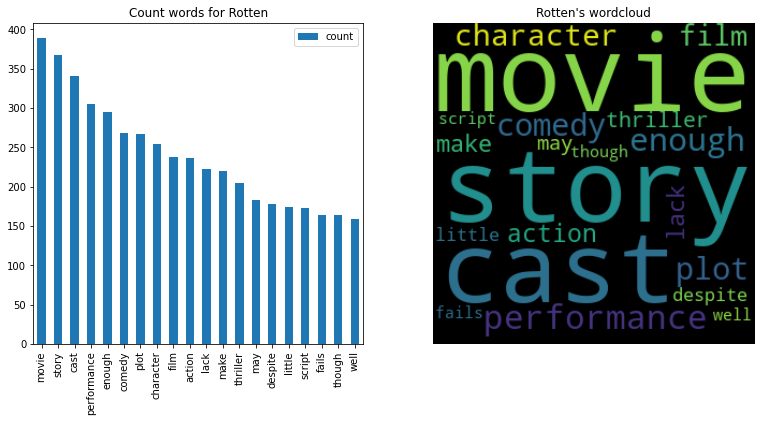

In [ ]:
X = movies[(movies["X_lem"].isna() == False) & (movies['tomatometer_status'] == "Rotten")]["X_lem"].apply(lambda wlist: " ".join(wlist))    
get_count(X, "Rotten")

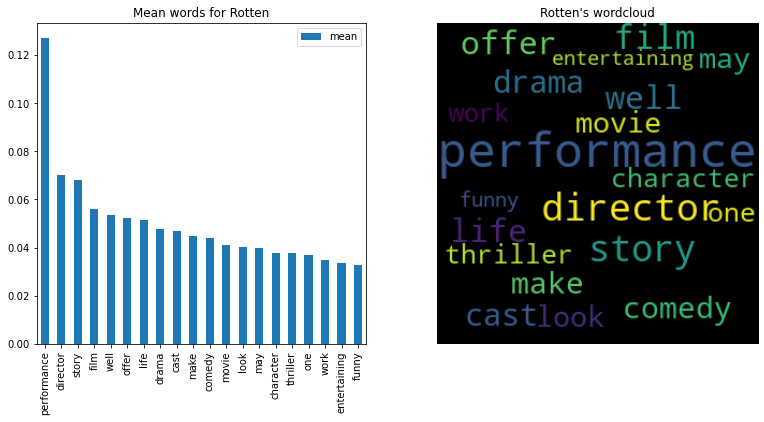

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

X = movies[(movies["X_lem"].isna() == False) & (movies['tomatometer_status'] != "Rotten")]["X_lem"].apply(lambda wlist: " ".join(wlist))
get_tfidf(X, name = "Rotten")

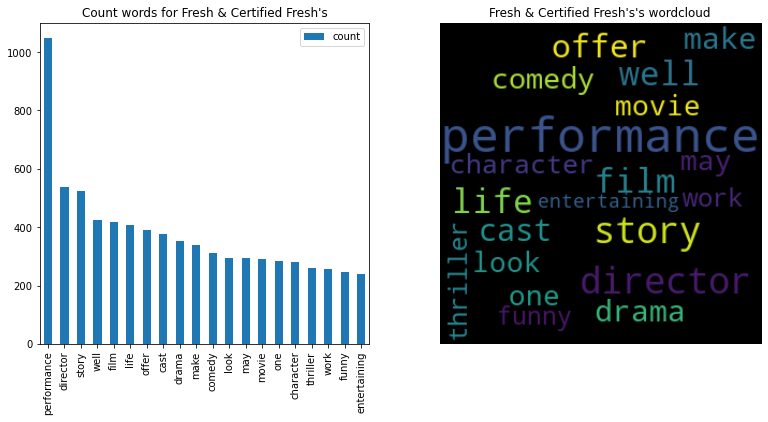

In [ ]:
X = movies[(movies["X_lem"].isna() == False) & (movies['tomatometer_status'] != "Rotten")]["X_lem"].apply(lambda wlist: " ".join(wlist))
get_count(X, "Fresh & Certified Fresh's")

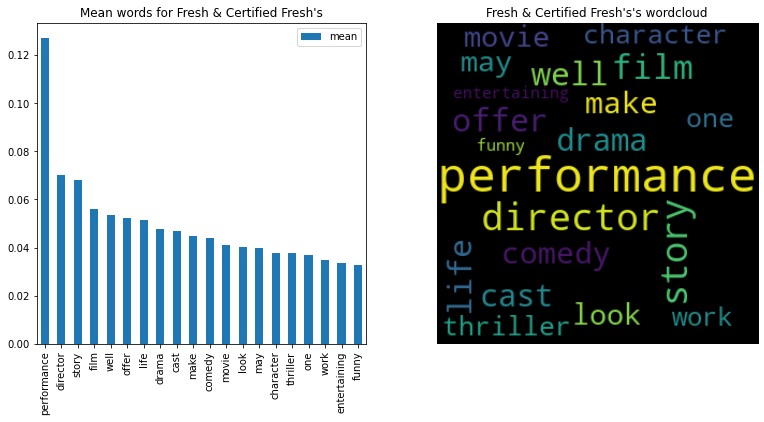

In [ ]:
get_tfidf(X, "Fresh & Certified Fresh's")

# Count & TF IDF per genre

/var/folders/ts/l4jvqvn135g1lpkckf7t5cmc0000gn/T/ipykernel_994/3370676614.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.subplots(figsize=(13,13))


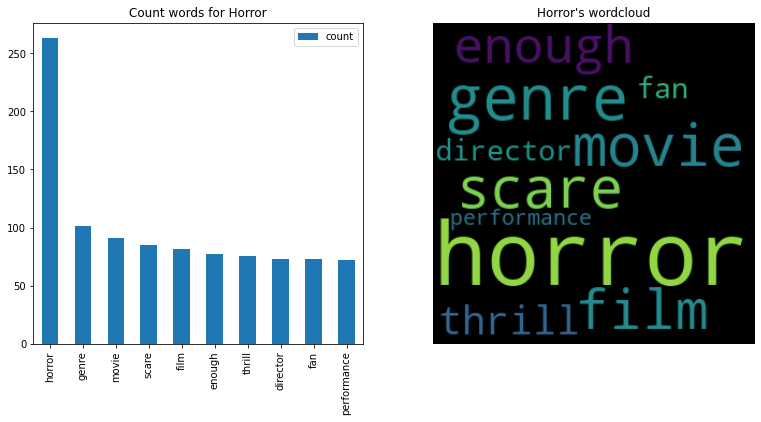

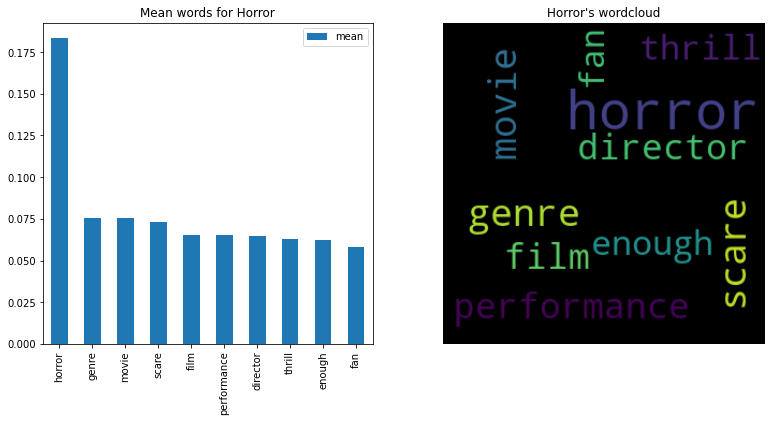

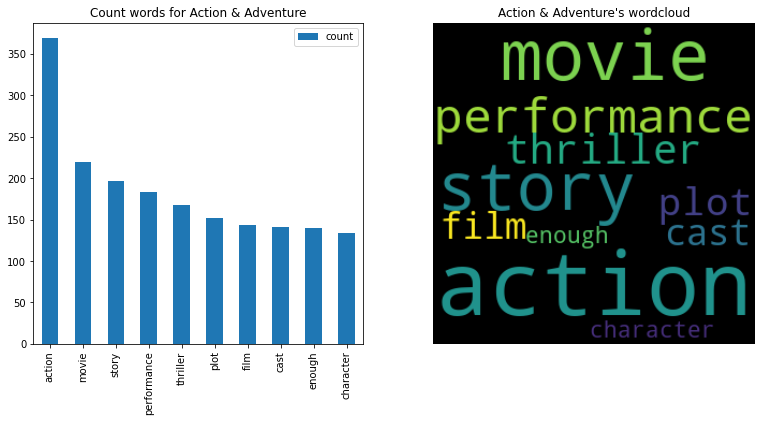

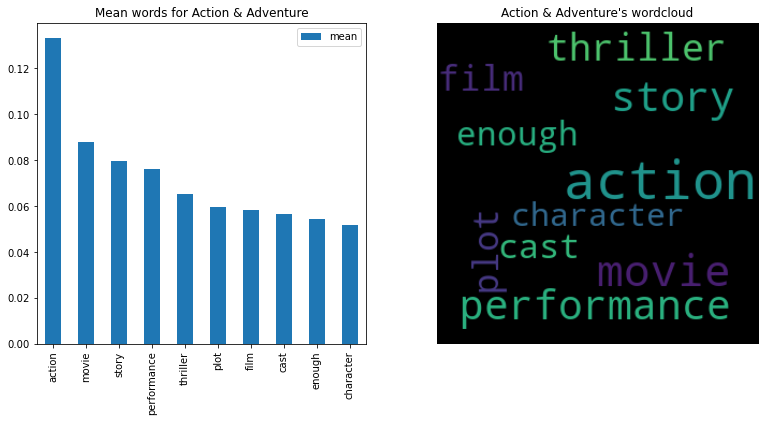

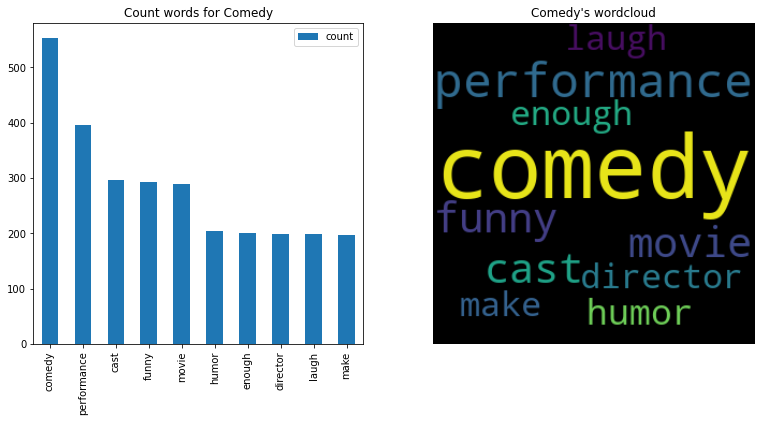

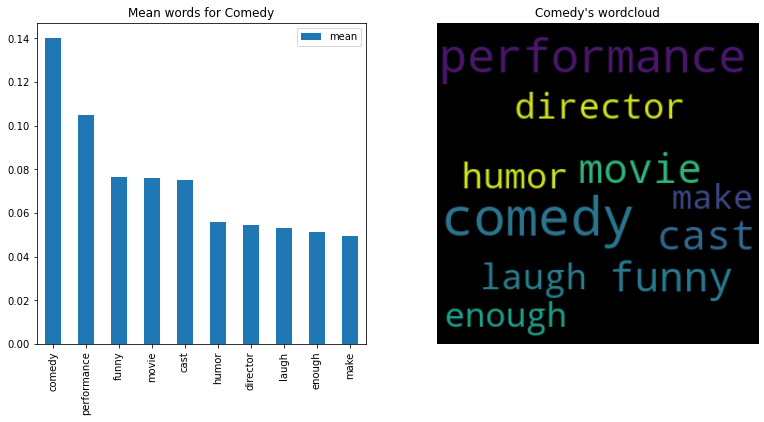

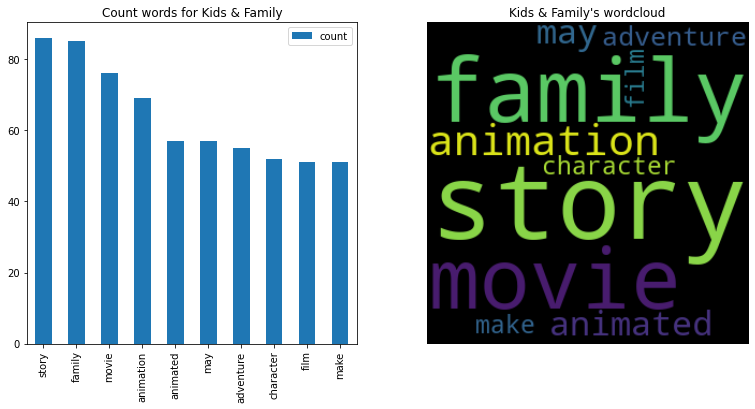

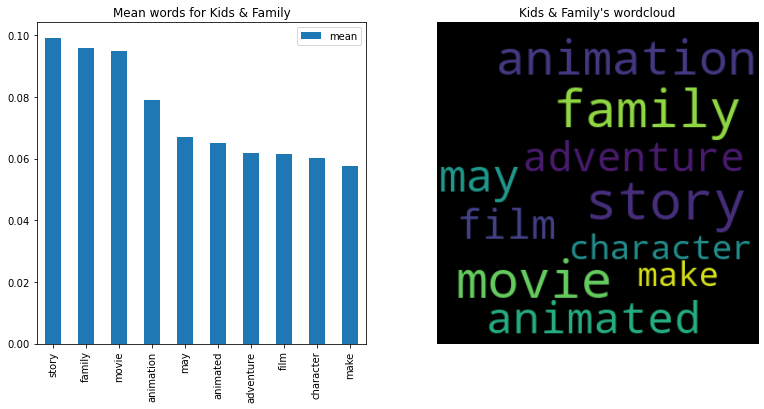

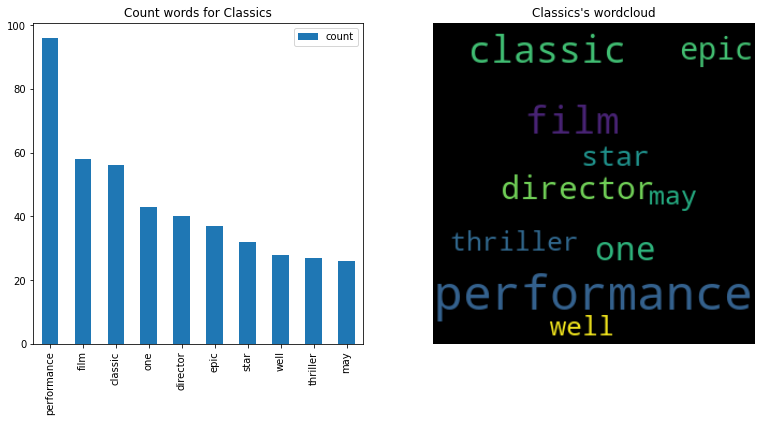

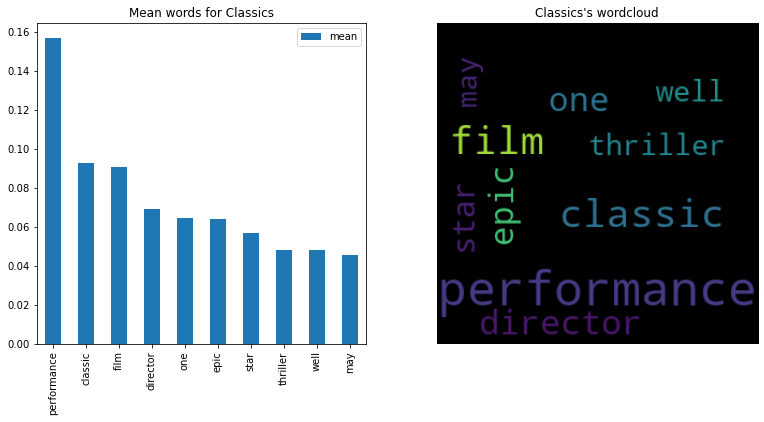

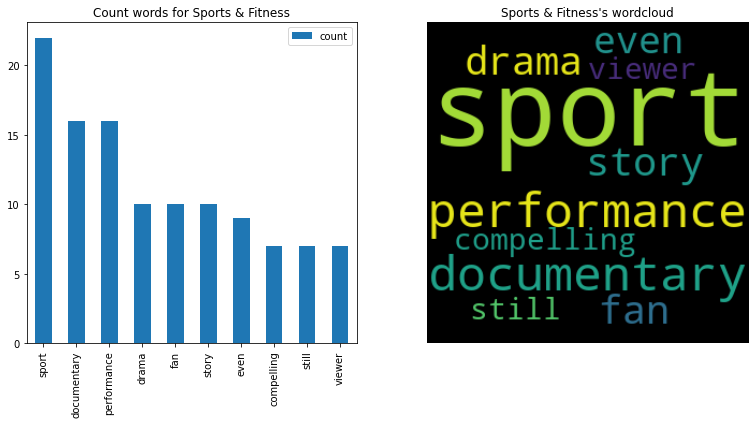

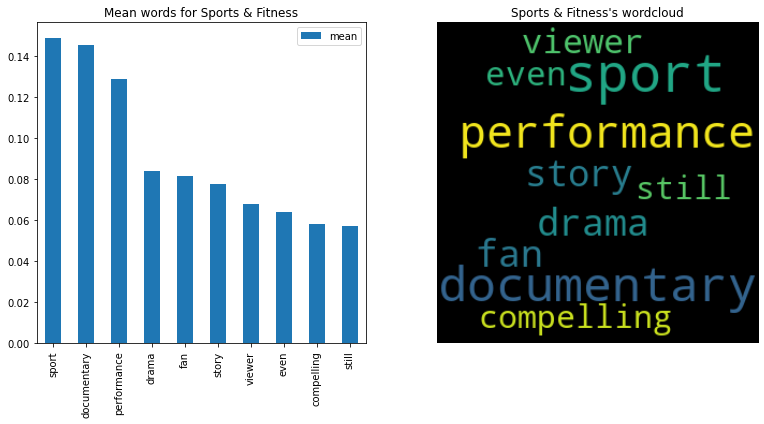

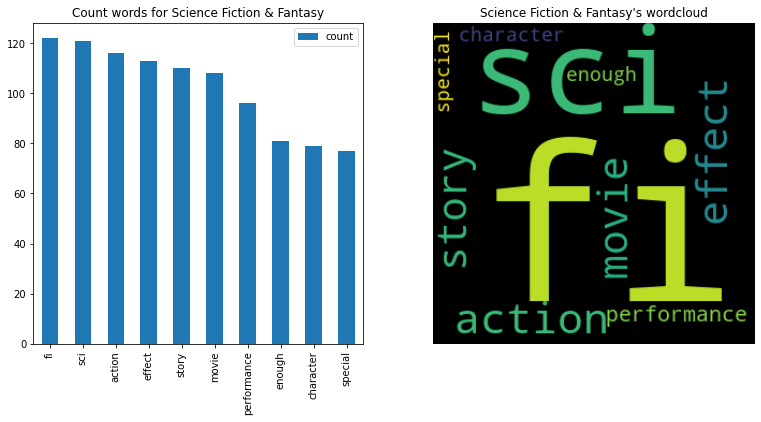

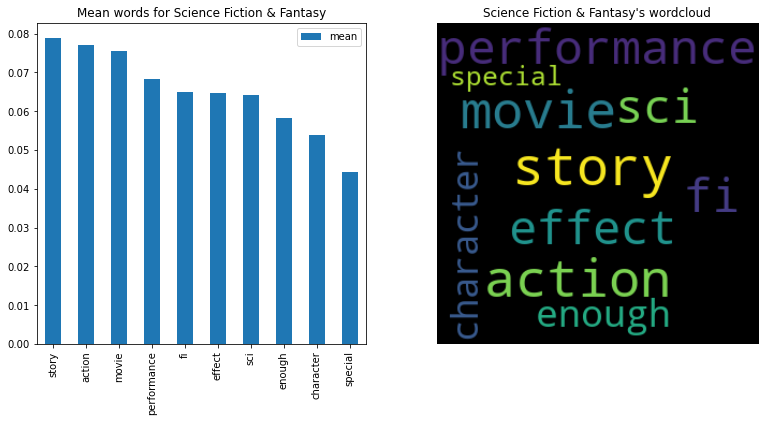

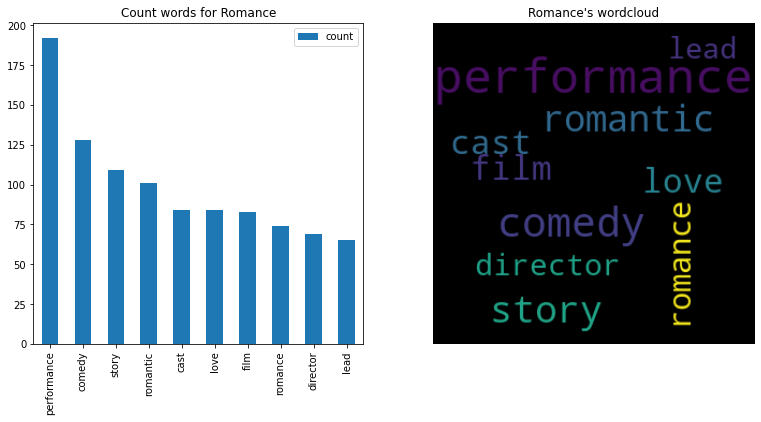

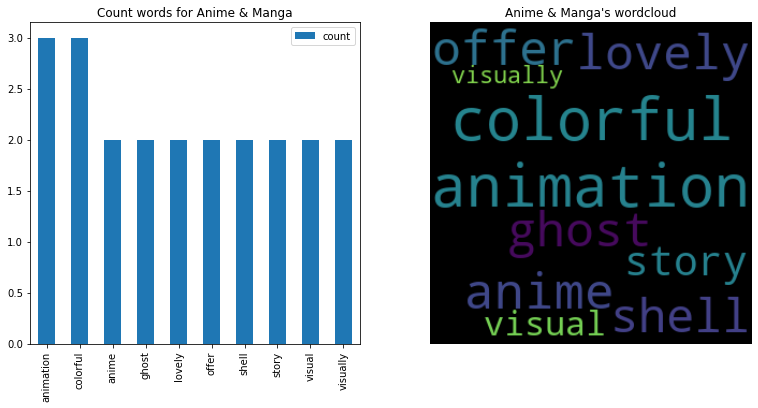

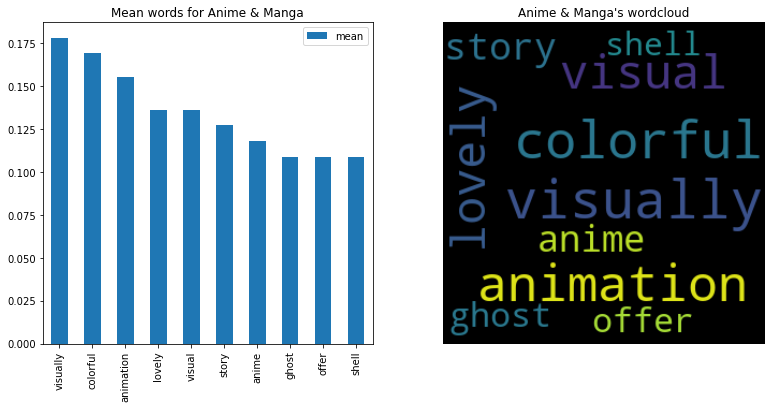

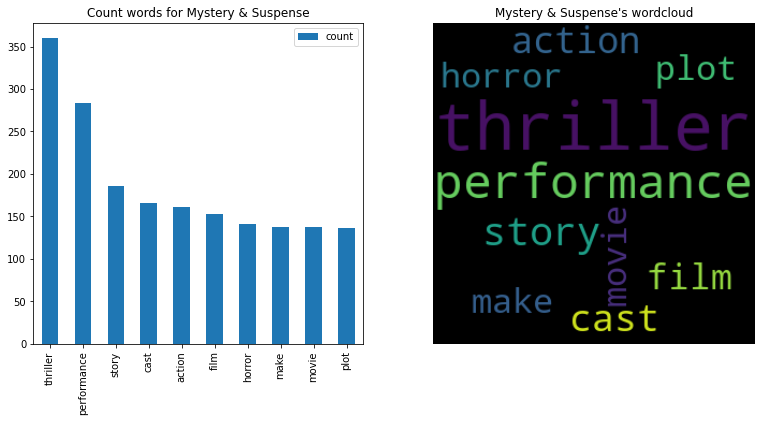

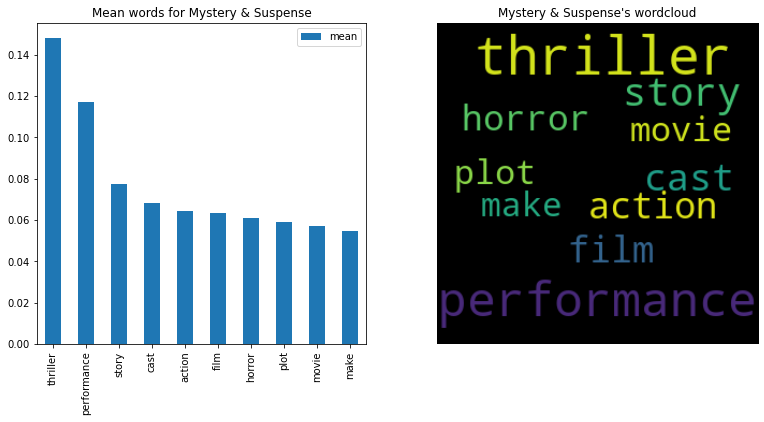

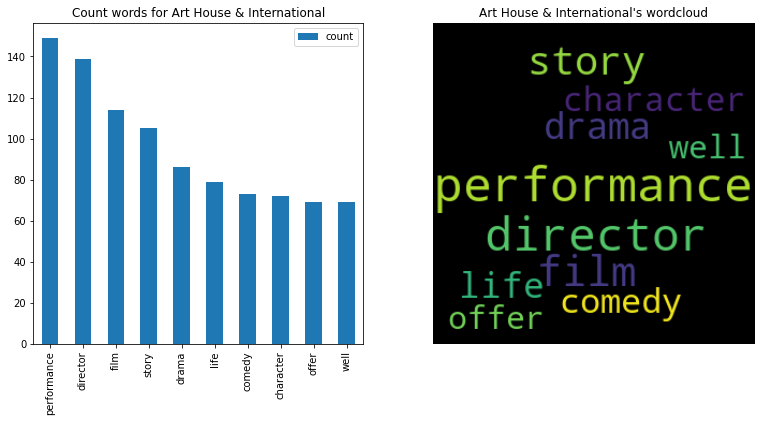

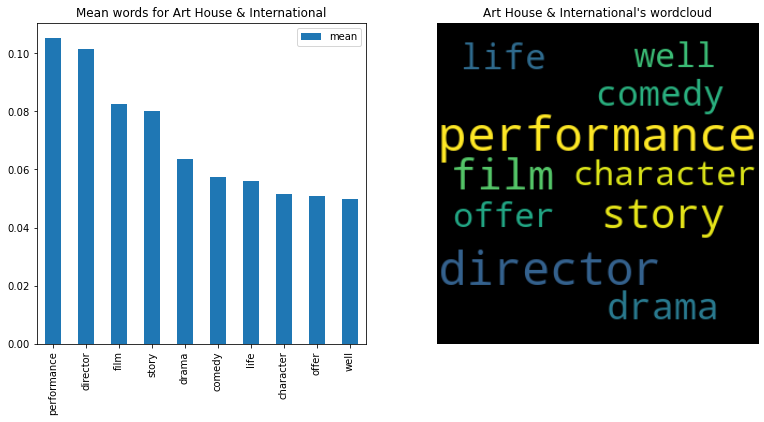

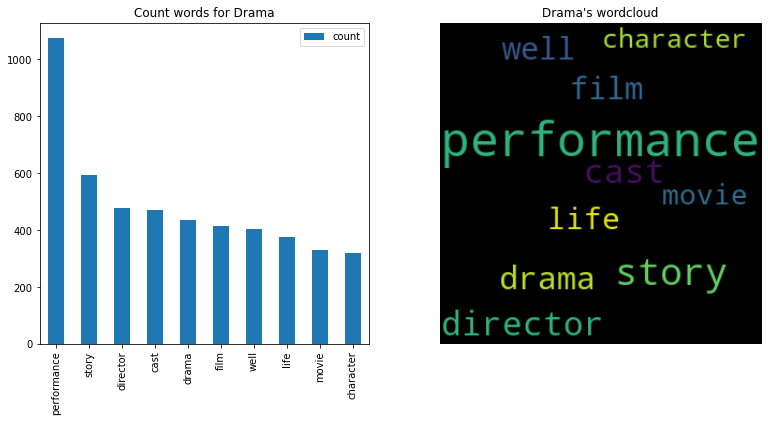

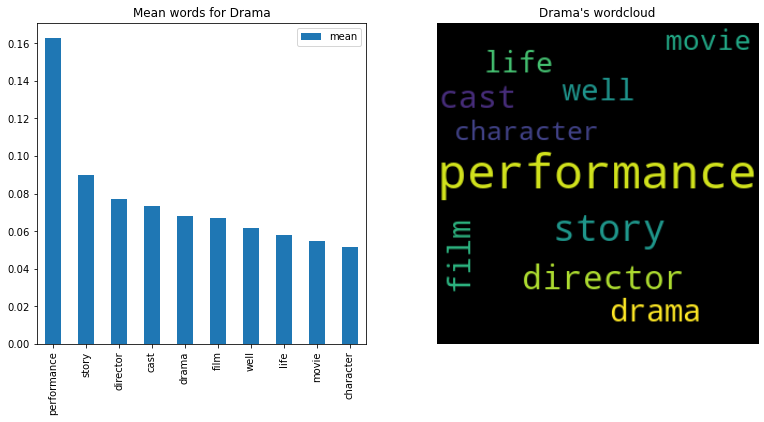

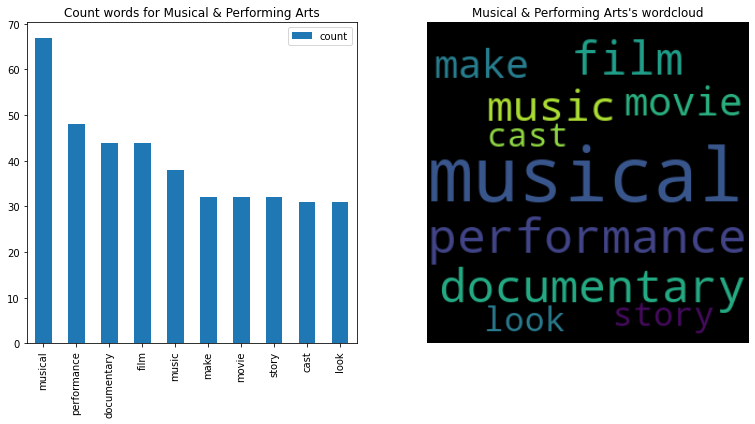

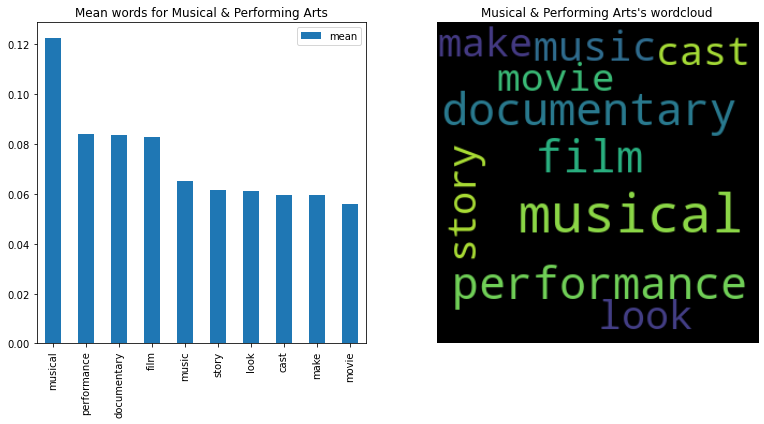

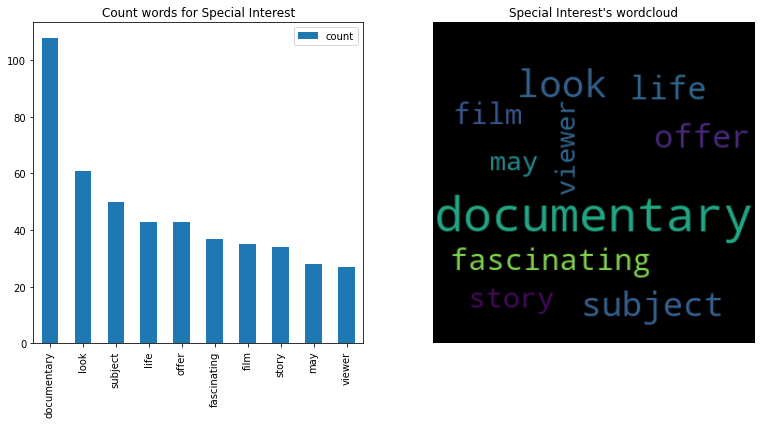

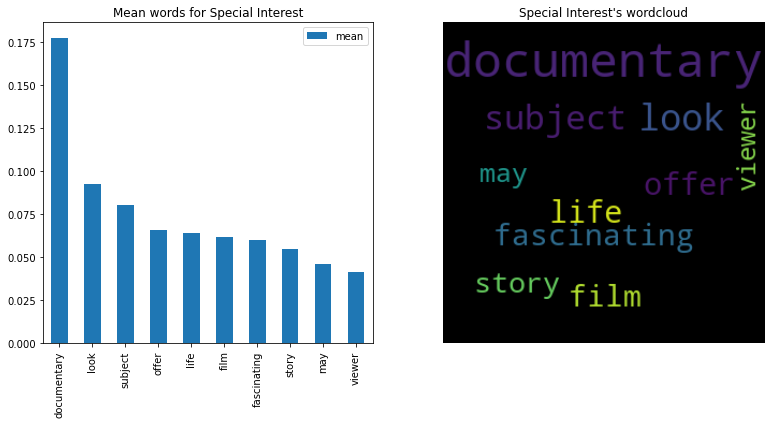

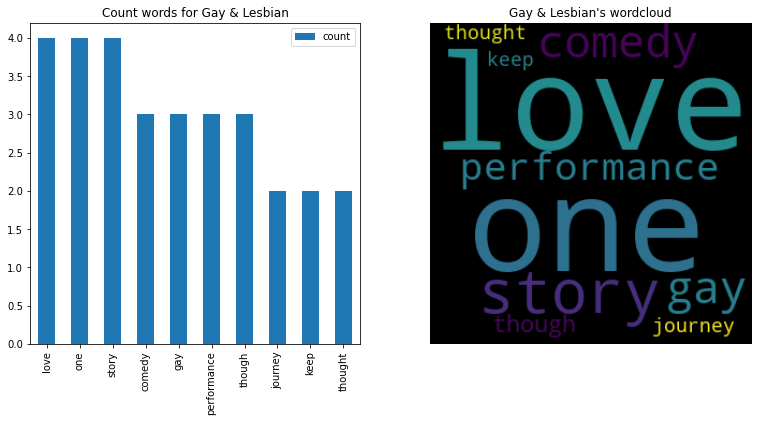

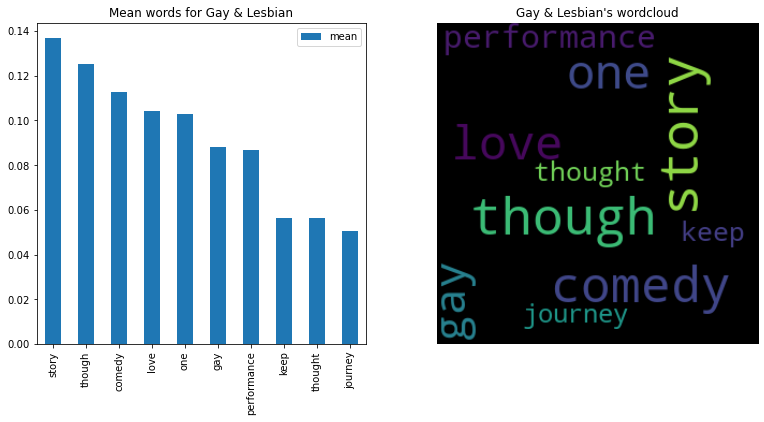

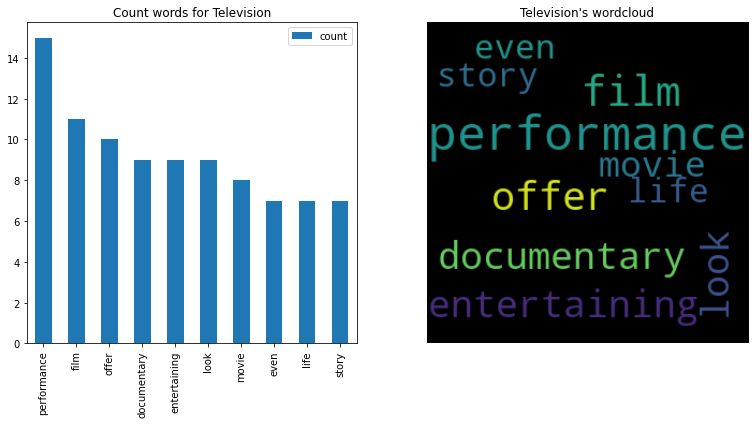

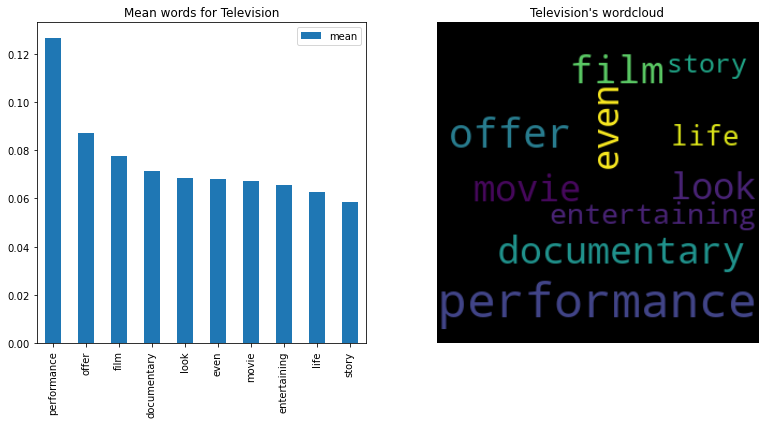

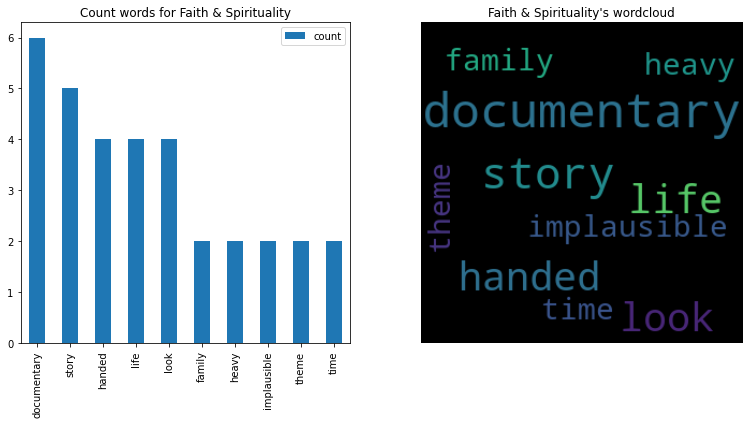

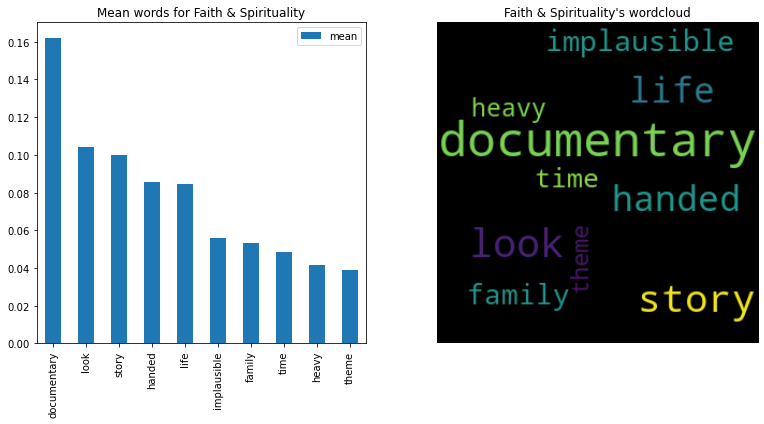

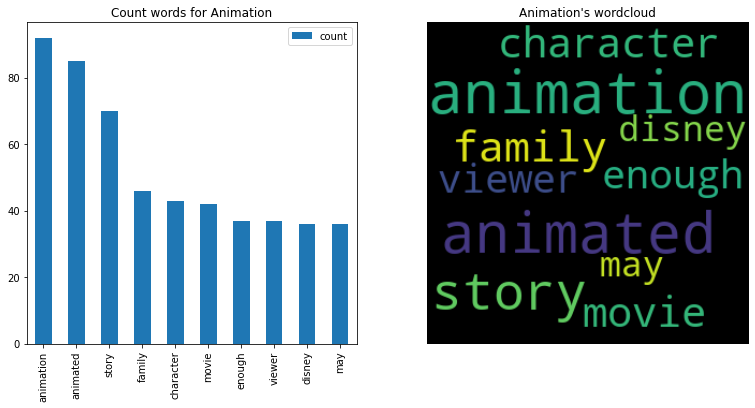

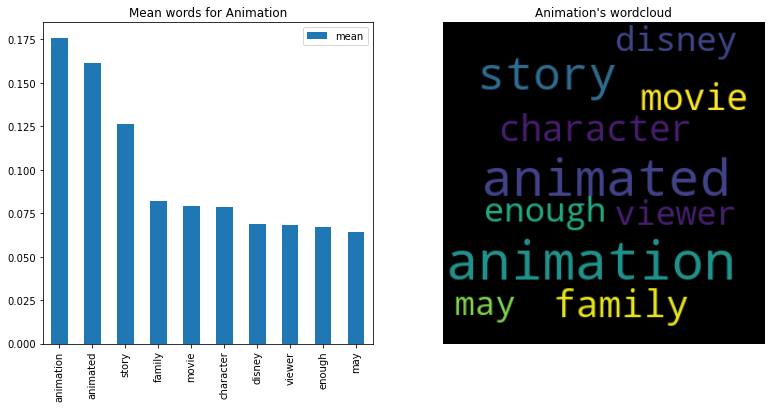

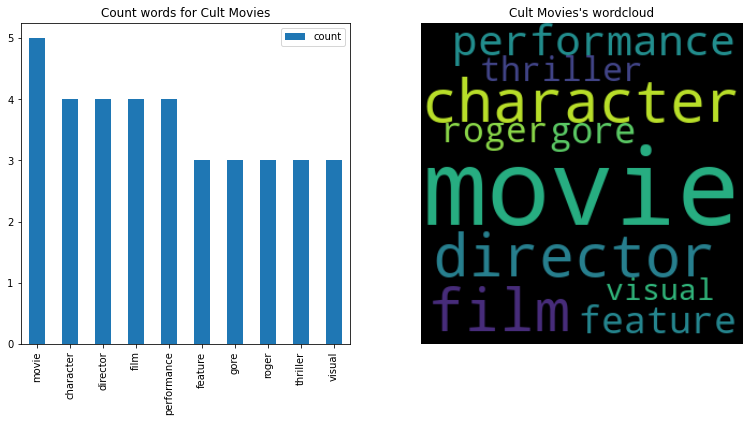

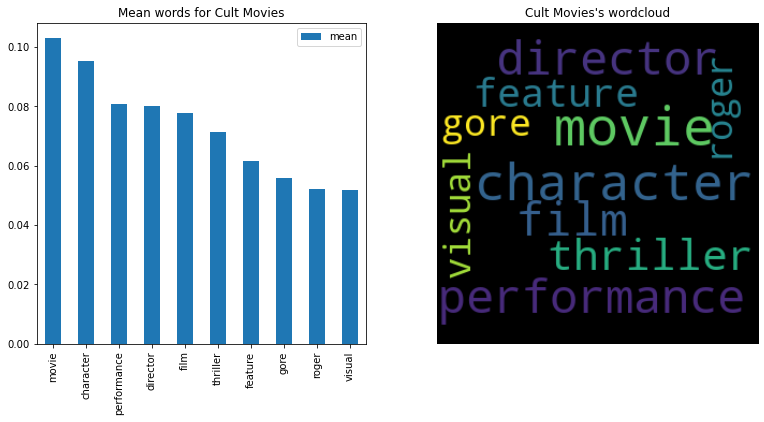

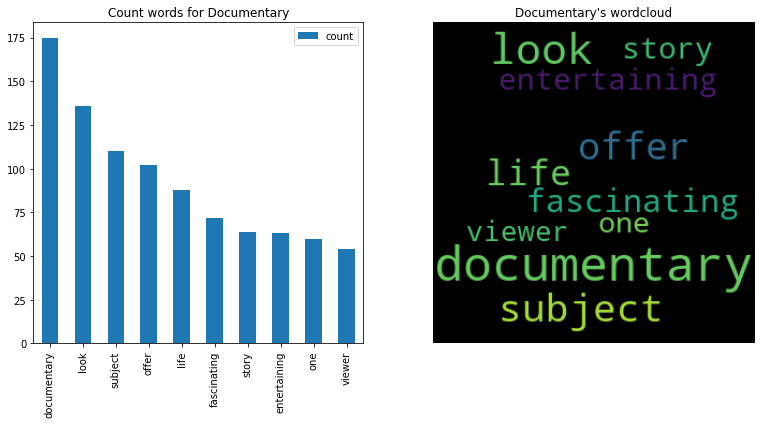

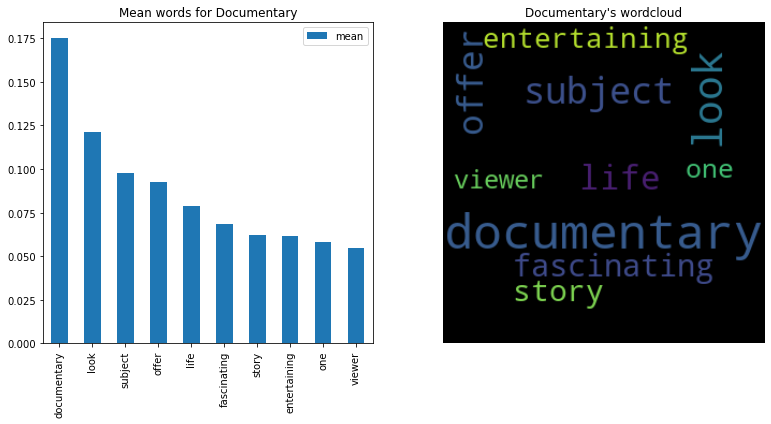

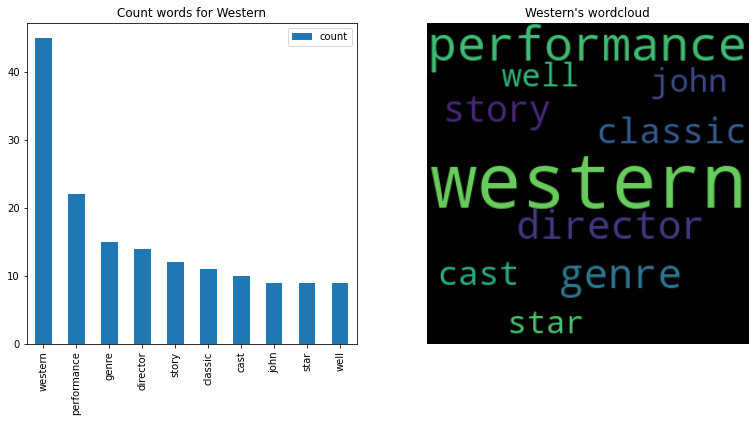

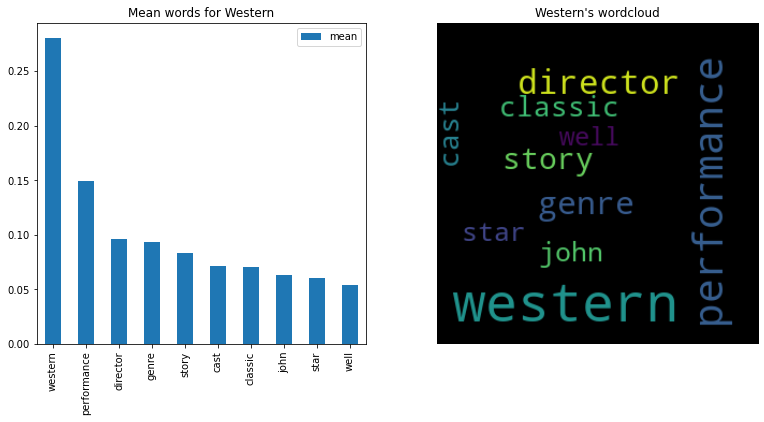

In [ ]:
to_list = lambda string: string.split(", ") if type(string) == str else []

list_genres = set(movies["genres"].sum())
for genre in list_genres:
    X = movies[(movies["X_lem"].isna() == False) & (movies["genres"].str.contains(genre))]["X_lem"].apply(lambda wlist: " ".join(wlist))
    get_count(X, genre, 10)
    get_tfidf(X, genre, 10)


# Analyse audience comments

In [ ]:
from ast import literal_eval
#critic_reviews["tokens"] =  critic_reviews[critic_reviews['review_content'].isna() != True]['review_content'].apply(lambda sentence: [w.lower() for w in nltk.word_tokenize(sentence)])
get_tokens_list = lambda x: literal_eval(x) if type(x) == str else []
#critic_reviews["tokens"] =  critic_reviews["tokens"].apply(lambda sentence: [w.split(",") for w in sentence if type(sentence) == str])
#critic_reviews["tokens"].apply(get_tokens_list)
critic_reviews["tokens"] = critic_reviews["tokens"].apply(get_tokens_list)
#type(critic_reviews.at[0, "tokens"])

In [ ]:
#critic_reviews.to_csv('rotten_tomatoes_critic_reviews_tokens_light.csv', columns=["rotten_tomatoes_link","critic_name","publisher_name","tokens"])
#movies.to_csv('rotten_tomatoes_movies_with_nlp.csv')

In [ ]:
df_tokens_per_movies = pd.pivot_table(critic_reviews[["rotten_tomatoes_link","tokens"]], values=["tokens"], index=['rotten_tomatoes_link'], aggfunc={"tokens": sum})
df_tokens_per_movies.reset_index(inplace=True)

In [ ]:
#df_tokens_per_movies.columns = ["rotten_tomatoes_link", "tokens"]
df_tokens_per_movies

rotten_tomatoes_link  \
0                         m/+_one_2019   
1                                 m/+h   
2                              m/-_man   
3      m/-cule_valley_of_the_lost_ants   
4                            m/0814255   
...                                ...   
17707                      m/zoot_suit   
17708                       m/zootopia   
17709                m/zorba_the_greek   
17710                           m/zulu   
17711                      m/zulu_dawn   

                                                  tokens  
0      [more, than, gets, by, on, the, strength, of, ...  
1      [ultimately, plush, exceeds, its, very, limite...  
2      [too, many, pieces, of, the, puzzle, are, left...  
3      [a, dialogue-free, bug, saga, carried, along, ...  
4      [a, fantasy, adventure, that, fuses, greek, my...  
...                                                  ...  
17707  [the, staging, is, busy, and, clever, ,, thoug...  
17708  [the, variety, of, cute, -, and, occasionally,...  
17709  [zorba, the, greek, is, a, motion, picture, th...  
17710  [this, amazing, film, is, devastatingly, accur...  
17711  [seen, today, ,, it, 's, not, only, a, startli...  

[17712 rows x 2 columns]

In [ ]:
#critic_reviews["tokens"] =  critic_reviews[critic_reviews['tokens'].isna() != True]['tokens'].apply(lambda sentence: [w.lower() for w in nltk.word_tokenize(sentence)])
#cleaning_tokens = lambda tokens: [ str(w) for w in tokens if str(w) not in nltk.corpus.stopwords.words("english") ] if isinstance(tokens, list) else []
#df_tokens_per_movies["X_clean"] = df_tokens_per_movies[df_tokens_per_movies["tokens"].isna() == False]["tokens"].apply(cleaning_tokens)

In [ ]:
#df_tokens_per_movies["X_stem"] = df_tokens_per_movies[df_tokens_per_movies["X_clean"].isna() == False]["X_clean"].apply(lambda words: [porter.stem(word.lower()) for word in words] )
#df_tokens_per_movies["X_lem"] = df_tokens_per_movies[df_tokens_per_movies["X_clean"].isna() == False]["X_clean"].apply(lambda words: [wnl.lemmatize(word.lower()) for word in words] )

In [ ]:
#df_tokens_per_movies.to_csv('df_reviews_tokens_per_movies.csv')
#df_reviews_tokens_per_movies.csv
link = "./df_reviews_tokens_per_movies.csv"
df_tokens_per_movies = pd.read_csv(link, converters={'tokens': get_tokens_list,\
                                                     'X_lem': get_tokens_list,\
                                                     'X_stem': get_tokens_list,\
                                                     'X_clean': get_tokens_list})



In [ ]:
df_tokens_per_movies_sample = df_tokens_per_movies.sample(n=1000, random_state=1)
df_tokens_per_movies_sample['X_clean'] = df_tokens_per_movies_sample['X_clean'].apply(lambda data: [w for w in data if not w in '[]()"",.'])
df_tokens_per_movies_sample['X_stem'] = df_tokens_per_movies_sample['X_stem'].apply(lambda data: [w for w in data if not w in '[]()"",.'])
df_tokens_per_movies_sample['X_lem'] = df_tokens_per_movies_sample['X_lem'].apply(lambda data: [w for w in data if not w in '[]()"",.'])

In [ ]:
df_tokens_per_movies_sample.head()

Unnamed: 0       rotten_tomatoes_link  \
612           612  m/1014137-monkey_business   
2941         2941      m/as_i_lay_dying_2013   
4371         4371             m/catch_a_fire   
13961       13961          m/straw-dogs-2011   
9073         9073       m/knife_in_the_water   

                                                  tokens  \
612    [there, 's, something, a, little, special, abo...   
2941   [ultimately, ,, as, i, lay, dying, is, another...   
4371   [there, 's, a, lot, to, process, here, --, to,...   
13961  [straw, dogs, has, been, cut, from, as, famili...   
9073   [the, sexual, tensions, build, slowly, and, su...   

                                                 X_clean  \
612    ['s, something, little, special, film, might, ...   
2941   [ultimately, lay, dying, another, franco, lark...   
4371   ['s, lot, process, --, credit, film, ambiguous...   
13961  [straw, dogs, cut, familiar, hackneyed, cloth,...   
9073   [sexual, tensions, build, slowly, subtly, expl...   

                                                  X_stem  \
612    ['s, someth, littl, special, film, might, well...   
2941   [ultim, lay, die, anoth, franco, lark, experi,...   
4371   ['s, lot, process, --, credit, film, ambigu, t...   
13961  [straw, dog, cut, familiar, hackney, cloth, on...   
9073   [sexual, tension, build, slowli, subtli, explo...   

                                                   X_lem  
612    ['s, something, little, special, film, might, ...  
2941   [ultimately, lay, dying, another, franco, lark...  
4371   ['s, lot, process, --, credit, film, ambiguous...  
13961  [straw, dog, cut, familiar, hackneyed, cloth, ...  
9073   [sexual, tension, build, slowly, subtly, explo...

[Text(0.5, 1.0, 'Lemmatized text')]

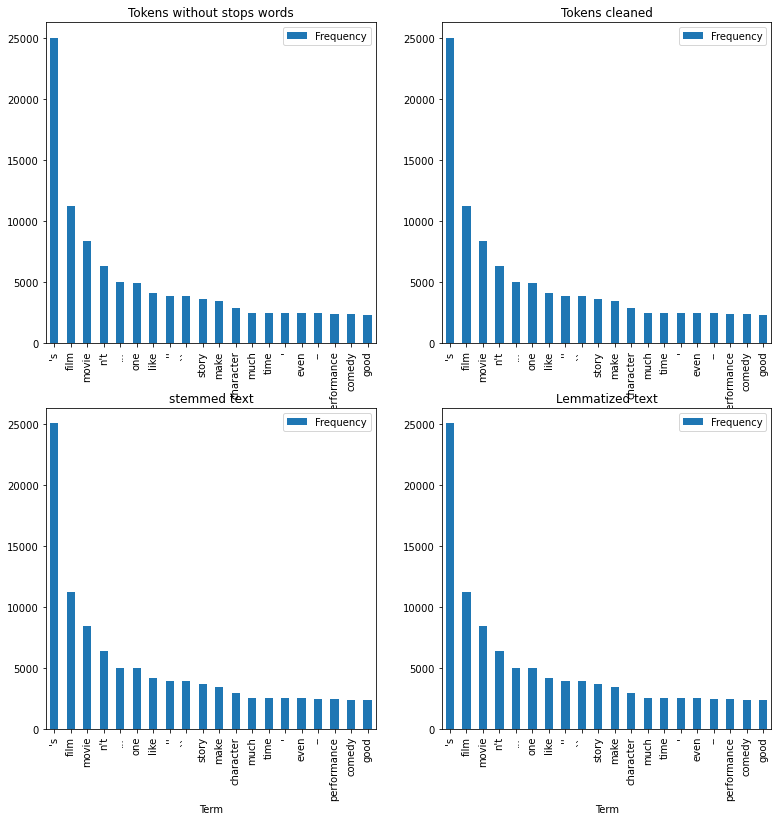

In [ ]:
fig = plt.subplots(figsize=(13,13))

ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,2,3)
ax4 = plt.subplot(2,2,4)

df_audience_tokens = pd.DataFrame.from_dict(nltk.FreqDist(df_tokens_per_movies_sample[df_tokens_per_movies_sample["tokens"].isna() == False]["X_lem"].sum()), orient='index')
df_audience_tokens.columns = ['Frequency']
df_audience_tokens.index.name = 'Term'

df_audience_clean = pd.DataFrame.from_dict(nltk.FreqDist(df_tokens_per_movies_sample[df_tokens_per_movies_sample["X_clean"].isna() == False]["X_lem"].sum()), orient='index')
df_audience_clean.columns = ['Frequency']
df_audience_clean.index.name = 'Term'

df_audience_stem = pd.DataFrame.from_dict(nltk.FreqDist(df_tokens_per_movies_sample[df_tokens_per_movies_sample["X_stem"].isna() == False]["X_lem"].sum()), orient='index')
df_audience_stem.columns = ['Frequency']
df_audience_stem.index.name = 'Term'

df_audience_lem = pd.DataFrame.from_dict(nltk.FreqDist(df_tokens_per_movies_sample[df_tokens_per_movies_sample["X_lem"].isna() == False]["X_lem"].sum()), orient='index')
df_audience_lem.columns = ['Frequency']
df_audience_lem.index.name = 'Term'

#initial text
df_audience_tokens.sort_values(['Frequency'], ascending=False).head(20).plot(kind="bar", ax = ax1)
ax1.set(title="Tokens without stops words")

#after cleaning up stopwords and punctuation
df_audience_clean.sort_values(['Frequency'], ascending=False).head(20).plot(kind="bar", ax = ax2)
ax2.set(title="Tokens cleaned")

#cleaning up stopwords and punctuation + stemmer
df_audience_stem.sort_values(['Frequency'], ascending=False).head(20).plot(kind="bar", ax= ax3)
ax3.set(title="stemmed text")

#after cleaning up stopwords and punctuation + lemmatizer.
df_audience_lem.sort_values(['Frequency'], ascending=False).head(20).plot(kind="bar", ax= ax4)
ax4.set(title="Lemmatized text")

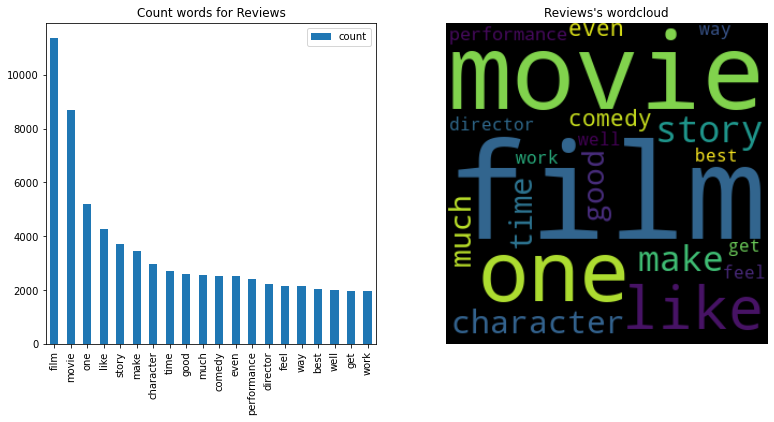

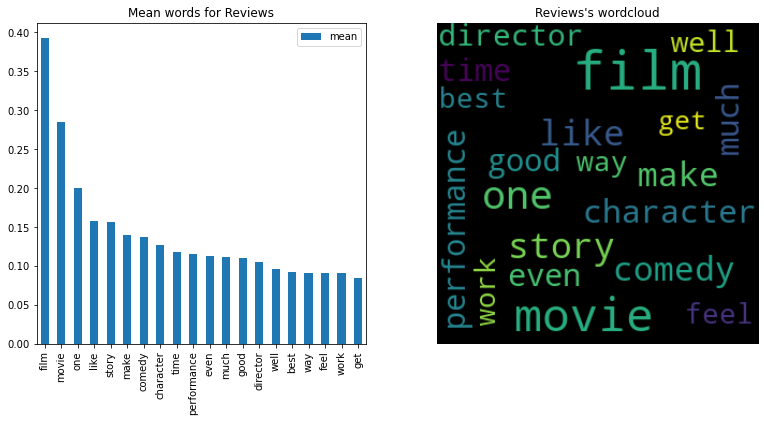

In [ ]:
X = df_tokens_per_movies_sample["X_lem"].apply(lambda wlist: " ".join(wlist))

get_count(X, "Reviews", 20)
get_tfidf(X, "Reviews", 20)


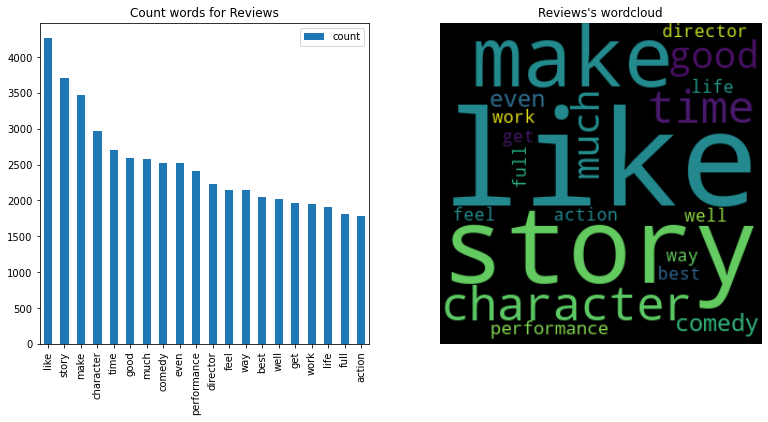

In [ ]:
def analyse_reviews(X,name = "Reviews",max_features= 20,regex_pattern = "([a-zA-Z]{2,})",stop_words=["film", "movie", "one"]):
    vectorizer = CountVectorizer(token_pattern=regex_pattern, max_features=max_features,stop_words=stop_words)

    vectorizer.fit(X.values)
    text_matrix = vectorizer.fit_transform(X)

    df_matrix_neg = pd.DataFrame(text_matrix.toarray(), columns = vectorizer.get_feature_names_out())
    df_sum_matrix_neg = pd.DataFrame(df_matrix_neg.sum().sort_values(ascending=False), columns = ["count"])
    fig = plt.subplots(figsize=(13,13))

    ax1 = plt.subplot(2,2,1)
    ax2 = plt.subplot(2,2,2)

    ax1.set(title=f"Count words for {name}")
    df_sum_matrix_neg.plot(kind="bar", ax = ax1)

    #initial text
    wordcloud_neg = WordCloud(width=300, height=300, max_font_size=200, min_font_size=10)
    wordcloud_neg.generate_from_frequencies(df_matrix_neg.sum())

    ax2.imshow(wordcloud_neg, interpolation="bilinear")
    ax2.axis('off')
    ax2.set(title=f"{name}'s wordcloud")
    plt.margins(x=0, y=0)
analyse_reviews(X)